<a href="https://colab.research.google.com/github/Zalake/ML-Project-GAN-and-VAE-/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###########import everything that is possible#############

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
mnist=tf.keras.datasets.mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model






In [2]:
###############this is the first baseline model starts here ###########################

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_trainMNIST=tf.keras.utils.normalize(x_train,axis=1)
y_trainMNIST = ones((x_train.shape[0], 1))
x_testMNIST=tf.keras.utils.normalize(x_test,axis=1)
y_test = ones((x_test.shape[0], 1))
x_trainFake=np.random.rand(x_train.shape[0],28,28)
y_trainFake=zeros((x_trainFake.shape[0],1))

x_trainFinal,y_trainFinal = vstack((x_trainMNIST, x_trainFake)), vstack((y_trainMNIST, y_trainFake))

idx = np.random.permutation(len(x_trainFinal))
x_data,y_data=x_trainFinal[idx],y_trainFinal[idx]
print(x_data.shape)

11493376/11490434 [==============================] - 0s 0us/step
(120000, 28, 28)


In [4]:
#Train 0/1 Discriminator
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_data,y_data,epochs=3)


Epoch 1/3
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0016 - accuracy: 0.9991
Epoch 2/3
3750/3750 [==============================] - 7s 2ms/step - loss: 9.6752e-08 - accuracy: 1.0000
Epoch 3/3
3750/3750 [==============================] - 7s 2ms/step - loss: 1.3733e-08 - accuracy: 1.0000


In [6]:
def define_generator(latent_dim):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(784,activation=tf.nn.relu))
  model.add(tf.keras.layers.Reshape((28,28), input_shape=(784,)))
  return model
def define_gan(g_model, d_model):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

g_model=define_generator(100)
gan=define_gan(g_model,model)
Y=zeros((100,1))
for i in range(100):
    latentPoints=randn(100 * 100)
    latentPoints=latentPoints.reshape(100,100)
    Y=ones((100,1))
    gan.fit(latentPoints,Y)

model.summary()


4/4 [==============================] - 0s 4ms/step - loss: 3.2971e-19 - accuracy: 1.0000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 108,801
Trainable params: 0
Non-trainable params: 108,801
_________________________________________________________________


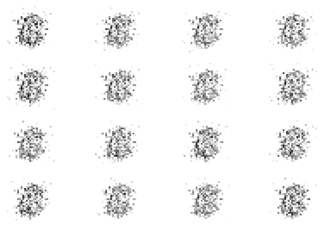

In [8]:
#######################testing for baseline model########################
x_input = randn(100 * 100)
x_input=x_input.reshape(100,100)
reconstructed_model = g_model
X=reconstructed_model.predict(x_input)
for i in range(16):
  plt.subplot(4,4,1+i)
  plt.axis('off')
  plt.imshow(X[i].reshape(28,28),cmap='gray_r')
plt.show()
pred=model.predict(X)

In [ ]:
###################second iteration for the model starts here############################
(x_train,_),(_,_) = mnist.load_data()
x_train = x_train.astype('float32')
x_train = x_train / 255.0
y_train=ones((x_train.shape[0],1))
np.random.shuffle(x_train)
print(x_train.shape)

def discriminator():
  model_discriminator=tf.keras.models.Sequential()
  model_discriminator.add(tf.keras.layers.Flatten())
  model_discriminator.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
  model_discriminator.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
  model_discriminator.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  model_discriminator.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model_discriminator

#Generator Model
def generator():
  model_generator=tf.keras.models.Sequential()
  model_generator.add(tf.keras.layers.Dense(100))
  model_generator.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
  model_generator.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
  model_generator.add(tf.keras.layers.Dense(784,activation=tf.nn.relu))
  model_generator.add(tf.keras.layers.Reshape((28,28), input_shape=(784,)))
  return model_generator


#GAN Model
def gan(gen,dis):
  dis.trainable=False
  ganModel=tf.keras.models.Sequential()
  ganModel.add(gen)
  ganModel.add(dis)
  ganModel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return ganModel
realSampleBatchSize=300
fakeSampleBatchSize=300
latentDimention=50
model_discriminator=discriminator()
model_generator=generator()
ganModel=gan(model_generator,model_discriminator)
epochs=1
for i in range(epochs):
  print ("epoch ",i)
  batches=int(x_train.shape[0]/600)
  for j in range(batches):
    realSampleIndex=randint(0,x_train.shape[0],realSampleBatchSize)
    data=x_train[realSampleIndex]
    label=y_train[realSampleIndex]
    latentPointsFake=randn(latentDimention*fakeSampleBatchSize)
    latentPointsFake = latentPointsFake.reshape(fakeSampleBatchSize, latentDimention)
    fakeData=model_generator.predict(latentPointsFake)
    fakeDataLabel=zeros((fakeSampleBatchSize,1))
    discriminatorData,discriminatorLabel=vstack((data,fakeData)),vstack((label,fakeDataLabel))
    
    d_loss=model_discriminator.train_on_batch(discriminatorData,discriminatorLabel)
    latentPointsGen=randn(latentDimention*fakeSampleBatchSize)
    latentPointsGen=latentPointsGen.reshape(fakeSampleBatchSize,latentDimention)
    GeneratedDataLabel=ones((fakeSampleBatchSize,1))
    
    gloss=ganModel.train_on_batch(latentPointsGen,GeneratedDataLabel)

####save the model if reuired##############
from datetime import datetime
model_generator.save('saved_model/genModel'+str(datetime.now())+'.h5')
!cp -r /content/saved_model /content/drive/My\ Drive/MachineLearning/TrainedModels


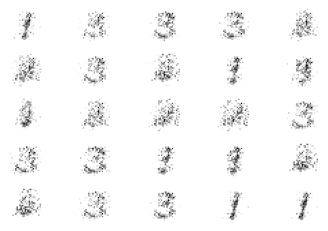

In [11]:
########testing results of second model here##############
testLatentPoints=randn(50,100)
testLatentPoints = testLatentPoints.reshape(100, 50)
generatedImages=model_generator.predict(testLatentPoints)
for i in range(25):
  #print (testLatentPoints[i])
  plt.subplot(5,5,1+i)
  plt.axis('off')
  plt.imshow(generatedImages[i].reshape(28,28),cmap='gray_r')
plt.show()

In [ ]:
#################model for 3rd iteration starts here#######################
(x_train,_),(_,_) = mnist.load_data()
x_train=expand_dims(x_train,-1)
x_train = x_train.astype('float32')
x_train = x_train / 255.0
y_train=ones((x_train.shape[0],1))
np.random.shuffle(x_train)
print(x_train.shape)

#Discriminator Model
def discriminator():
  model_discriminator=tf.keras.models.Sequential()
  model_discriminator.add(tf.keras.layers.Conv2D(64,(3,3), strides=(2,2),padding='same',input_shape=(28,28,1)))
  model_discriminator.add(LeakyReLU(alpha=0.2))
  model_discriminator.add(tf.keras.layers.Dropout(0.2))
  model_discriminator.add(tf.keras.layers.Conv2D(64,(3,3), strides=(2,2),padding='same'))
  model_discriminator.add(LeakyReLU(alpha=0.2))
  model_discriminator.add(tf.keras.layers.Dropout(0.2))
  model_discriminator.add(tf.keras.layers.Flatten())
  model_discriminator.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  opt = Adam(lr=0.0002, beta_1=0.5)
  model_discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model_discriminator

#Generator Model
def generator():
  model_generator=tf.keras.models.Sequential()
  # model_generator.add(tf.keras.layers.Dense(50,activation=tf.nn.relu,))
  model_generator.add(tf.keras.layers.Dense(128*7*7,input_dim=50))
  model_generator.add(LeakyReLU(alpha=0.2))
  model_generator.add(tf.keras.layers.Reshape((7,7,128)))
  model_generator.add(tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same'))
  model_generator.add(LeakyReLU(alpha=0.2))
  model_generator.add(tf.keras.layers.Conv2DTranspose(128,(3,3),strides=(2,2),padding='same'))
  model_generator.add(LeakyReLU(alpha=0.2))
  model_generator.add(tf.keras.layers.Conv2D(1,(7,7),padding='same',activation='tanh'))
  return model_generator


#GAN Model
def gan(gen,dis):
  dis.trainable=False
  ganModel=tf.keras.models.Sequential()
  ganModel.add(gen)
  ganModel.add(dis)
  ganModel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return ganModel
realSampleBatchSize=128
fakeSampleBatchSize=128
latentDimention=50
model_discriminator=discriminator()
# model_discriminator.summary()
model_generator=generator()
ganModel=gan(model_generator,model_discriminator)
epochs=1
for i in range(epochs):
  print ("epoch ",i)
  batches=int(x_train.shape[0]/256)
  for j in range(batches):
    realSampleIndex=randint(0,x_train.shape[0],realSampleBatchSize)
    data=x_train[realSampleIndex]
    data=data.reshape(data.shape[0],data.shape[1],data.shape[2],1)
    label=y_train[realSampleIndex]
    latentPointsFake=randn(latentDimention*fakeSampleBatchSize)
    latentPointsFake = latentPointsFake.reshape(fakeSampleBatchSize, latentDimention)
    fakeData=model_generator.predict(latentPointsFake)
    fakeDataLabel=zeros((fakeSampleBatchSize,1))
    discriminatorData,discriminatorLabel=vstack((data,fakeData)),vstack((label,fakeDataLabel))
    d_loss=model_discriminator.train_on_batch(discriminatorData,discriminatorLabel)

    latentPointsGen=randn(latentDimention*fakeSampleBatchSize)
    latentPointsGen=latentPointsGen.reshape(fakeSampleBatchSize,latentDimention)
    GeneratedDataLabel=ones((fakeSampleBatchSize,1))
    
    gloss=ganModel.train_on_batch(latentPointsGen,GeneratedDataLabel)
   
# from datetime import datetime
# model_generator.save('/content/drive/MyDrive/MachineLearning/TrainedModels/saved_model/genModel'+str(datetime.now())+'.h5')
# !cp -r /content/saved_model /content/drive/My\ Drive/MachineLearning/TrainedModels


In [ ]:
model_discriminator.save('/content/drive/MyDrive/MachineLearning/TrainedModels/saved_model/discModel'+str(datetime.now())+'.h5')

In [16]:
################testing final model here, this is the model in which conv2d is used#####################
#####either use the previously trained model or retrain and test again###############
model_generator = tf.keras.models.load_model('/content/drive/MyDrive/MachineLearning/TrainedModels/saved_model/genModel2020-12-12 21:48:29.539131.h5',compile=False)
testLatentPoints=randn(50,900)
testLatentPoints = testLatentPoints.reshape(900, 50)
generatedImages=model_generator.predict(testLatentPoints)

###########uncomment this to see the output for few samples below as shown###############
# for i in range(100):
#   plt.subplot(10,10,1+i)
#   plt.axis('off')
#   plt.imshow(generatedImages[i].reshape(28,28),cmap='gray_r')
# plt.show()

In [18]:
##############loss for GAN generated images ##########
##########Check VAE code for VAE loss with respect to discriminator###########
############GAN has less loss and hence better performance###############

model_discriminator=tf.keras.models.load_model('/content/drive/MyDrive/MachineLearning/TrainedModels/saved_model/discModel2020-12-12 21:59:02.611410.h5')
generatedLabels=ones((900,1))
score = model_discriminator.evaluate(generatedImages, generatedLabels, verbose=0)
print("Test loss:", score[0])
# op=model_discriminator.predict(generatedImages)
# print(op)

Test loss: 1.101934790611267
